# Diabetes Prediction

In [373]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import scipy.stats
from collections import Counter
import plotly.express as px

In [394]:
df=pd.read_csv(r'C:\Users\Ajay Dhariwal\Desktop\Github\Diabetes Prediction\diabetes.csv')

In [361]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [363]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Creating Boxplots to check for outlier values

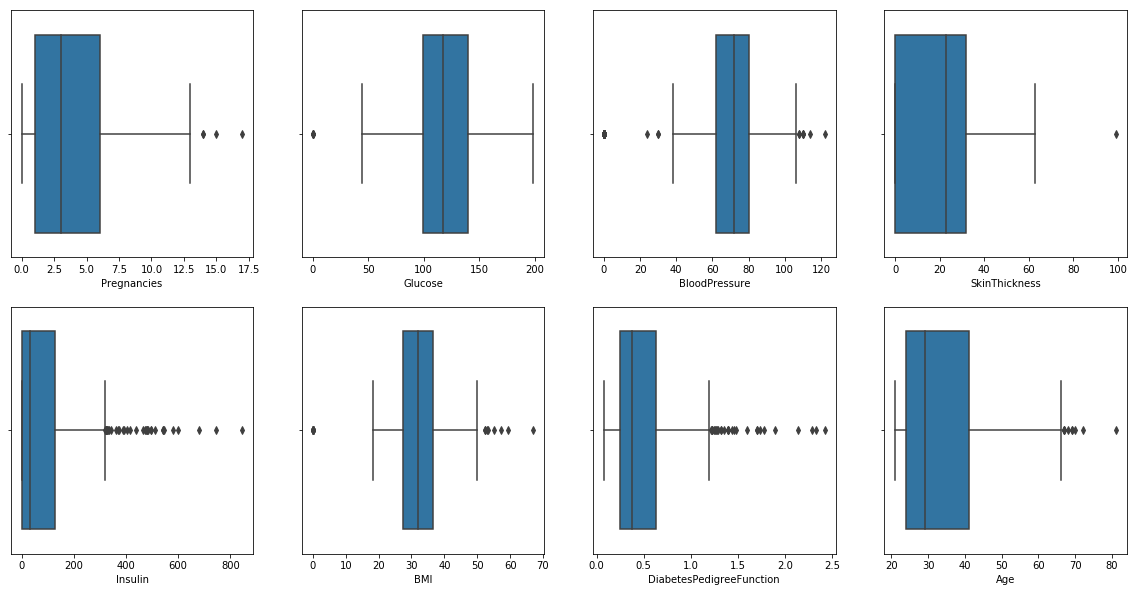

In [364]:
fig,ax1=plt.subplots(figsize=(20,10), nrows=2,ncols=4)
ax1=ax1.flatten()
start=0
col=df.columns
col_list=list(col)
for i in range(8):
    sns.boxplot(df[col_list[i]],ax=ax1[i])

## Creating a Countplot using Seaborn Library
* We find that outcome 0 is more prevalent than outcome 1

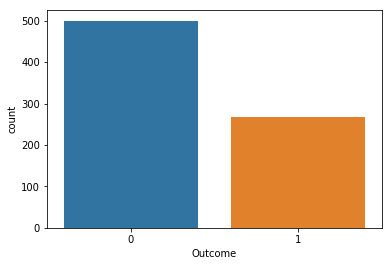

In [365]:
sns.countplot(df['Outcome'])

## Creating Kernel distribution plots to see the distribution of the variables

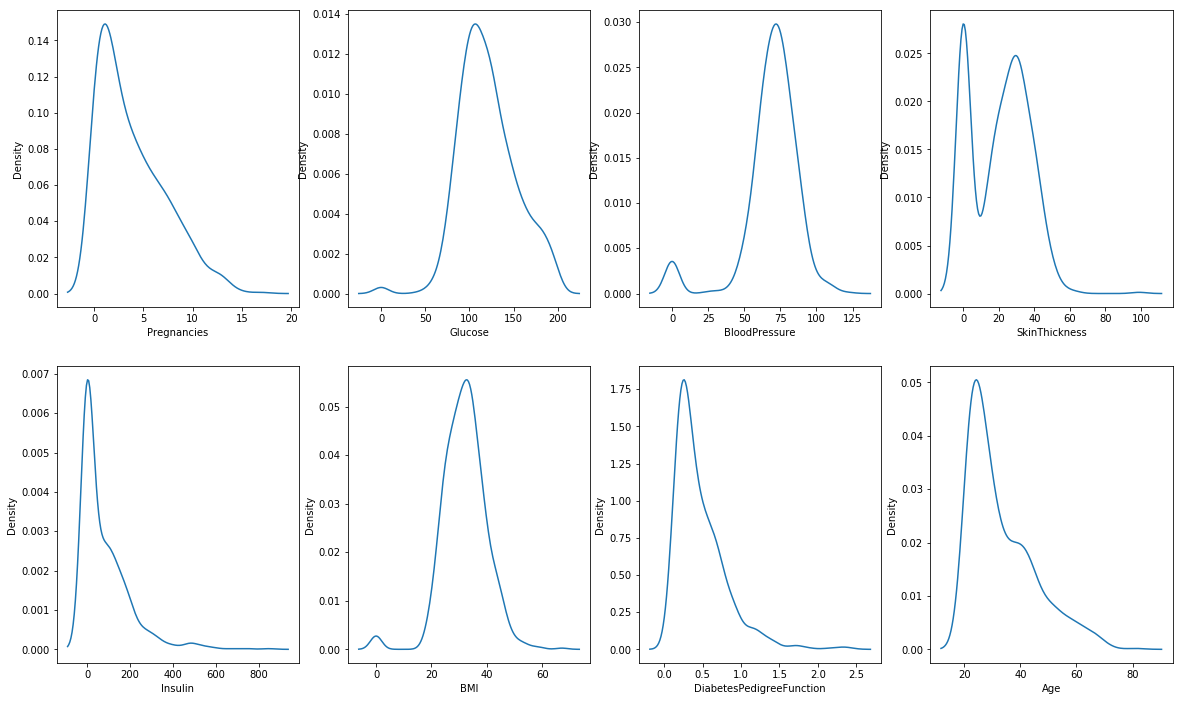

In [366]:
fig,ax1=plt.subplots(figsize=(20,12), nrows=2,ncols=4)
ax1=ax1.flatten()
start=0
col=df.columns
col_list=list(col)
for i in range(8):
    sns.kdeplot(df[col_list[i]],ax=ax1[i])

## Creating a Sampling Distribution using the  Central Limit Theorem

Let's create a Sampling distribution of means from the distribution with maximum skewness
<br><br>Variables Insulin and DiabetesPedigreeFunction are highly skewed

In [367]:
a=[]
for i in range(9):
    a.append(str(scipy.stats.skew(df[col_list[i]])))
skew={'Variable_name':col_list,'Skewness':a}
df_skew=pd.DataFrame(skew)
df_skew

,Variable_name,Skewness
0,Pregnancies,0.8999119408414357
1,Glucose,0.17341395519987735
2,BloodPressure,-1.8400052311728738
3,SkinThickness,0.109158762323673
4,Insulin,2.2678104585131753
5,BMI,-0.42814327880861786
6,DiabetesPedigreeFunction,1.9161592037386292
7,Age,1.127389259531697
8,Outcome,0.6337757030614577


In [368]:
sampling_mean_Insulin=[]
sample_mean_Diab=[]
for i in range(20000):
    sample_mean=df['Insulin'].sample(n=30,random_state=np.random.RandomState()).mean()
    sampling_mean_Insulin.append(sample_mean)
    sample_mean_Dpf=df['DiabetesPedigreeFunction'].sample(n=30,random_state=np.random.RandomState()).mean()
    sample_mean_Diab.append(sample_mean_Dpf)

## Visualising the Sampling distribution using distribution plots  
   * Insulin
   * DiabetesPedigreeFunction

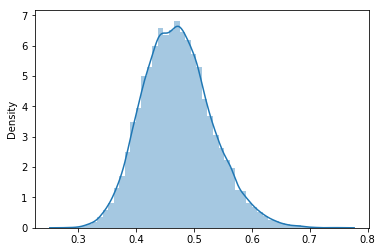

In [369]:
sns.distplot(sample_mean_Diab)

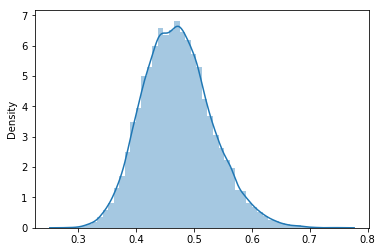

In [370]:
sns.distplot(sample_mean_Diab)

## Let's calculate the outliers in the dataset and get rid of these. 
* Outlier is any value that lies outside the 1.5 * Inter-Quartile Range
* The function written below takes dataframe as the input, the list of the columns of the dataframe and returns the indices of the outlier values which can then be used to remove the outlier values

In [371]:
def outlier_detection(df,features):
    outlier_list=[]
    for col in features:
        q1=np.percentile(df[col],25)
        q3=np.percentile(df[col],75)
        iqr=1.5*(q3-q1)
        l_step=q1-iqr
        u_step=q3+iqr
        outliers=df[(df[col]<l_step) |(df[col]>u_step)].index
        outlier_list.extend(outliers)
    return outlier_list

In [372]:
outliers=outlier_detection(df,col_list)
count_outliers=Counter(outliers)
outliers_to_drop=[i for i,j in count_outliers.items() if j>=1]
df.drop(df.loc[outliers_to_drop].index,inplace=True)

## Let's Visualise the variables once again using the distribution plots to see the change due to outlier removal

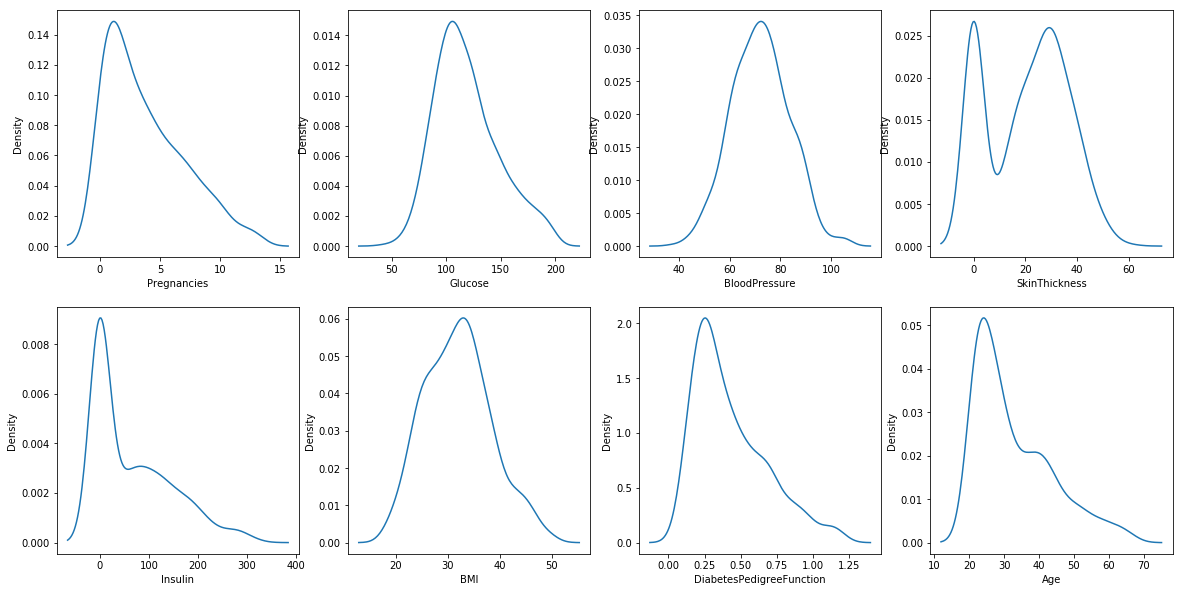

In [376]:
fig,ax2=plt.subplots(figsize=(20,10),nrows=2,ncols=4)
ax2=ax2.flatten()
for i in range(8):
    sns.kdeplot(df[col_list[i]],ax=ax2[i])

In [378]:
n_zeros={}
col_list_impute_zeros=[]
def impute_zeros(df,col_list):
    for i,j in enumerate(col_list):
        n_zeros[j]=df[col_list[i]][df[col_list[i]]==0].shape[0]
    for key,val in n_zeros.items():
        if n_zeros[key]>100:
            col_list_impute_zeros.append(key)
    return col_list_impute_zeros

In [379]:
z=impute_zeros(df,col_list)
for col in z:
    df[col][df[col]==0]=df[col].mean()

## Lets study the relation between age and outcome of diabetes

In [380]:
df_=df[df['Outcome']==1]['Age']
df_out=df_.value_counts().sort_values(ascending=False)[:10]
df_out_=pd.DataFrame(df_out)
df_out_.reset_index(inplace=True)
df_out_.columns=['Age','Diabetic_Count']
px.bar(df_out_,x='Age',y='Diabetic_Count')

Inferences from the above bar chart:
1. People with age 41 are the most diabetic
2. People with Age 31,22, and 45 are Second in the list of diabetic people
3. People with age 25,32, and 36 are third in the list of diabetic people

## Let's create a heatmap to check the pairwise correlations. 
## Also, we can create a Pairgrid to have more control on the graph

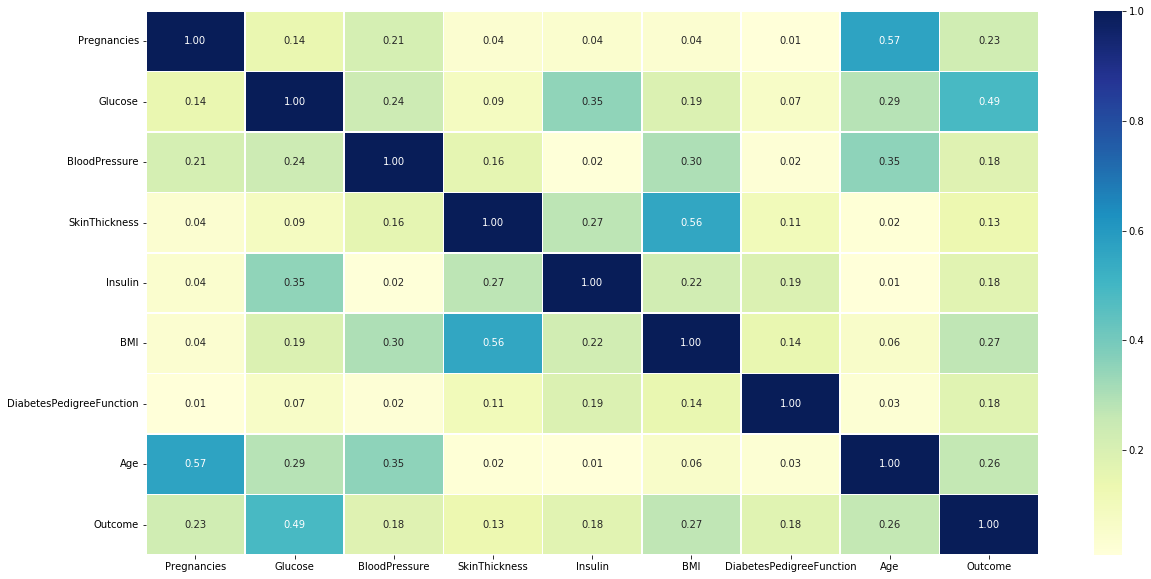

In [381]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(),annot=True,fmt=".2f",linewidths=0.5,cmap="YlGnBu")

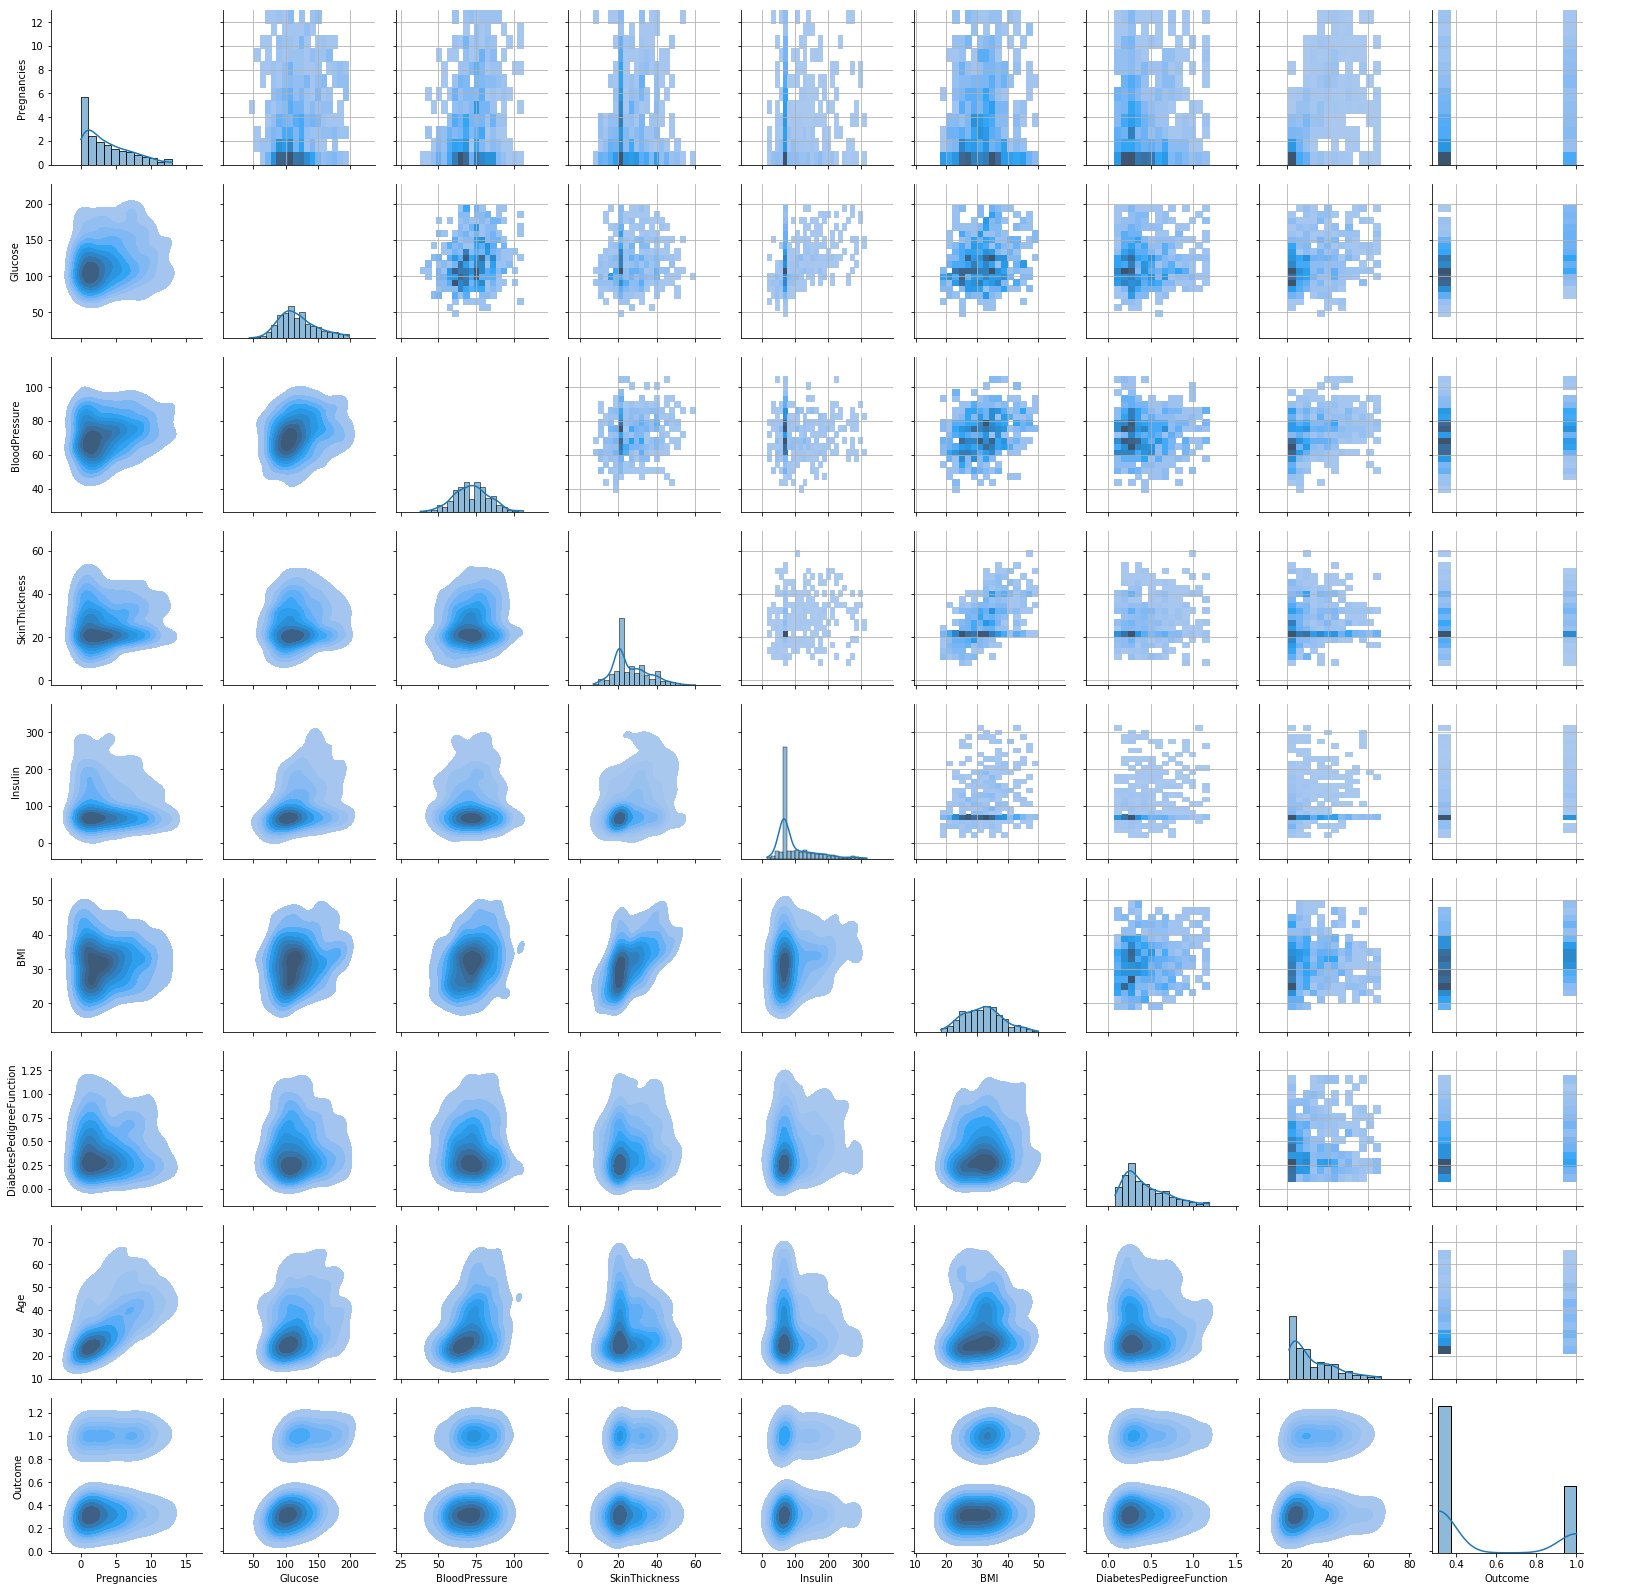

In [382]:
g1 = sns.PairGrid(df)
g1.map_upper(sns.histplot)
g1.map_lower(sns.kdeplot, fill=True)
g1.map_diag(sns.histplot, kde=True)

## Convert the numerical variables into categorical variables to and visualise using the countplot 

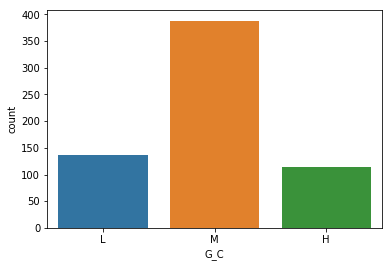

In [383]:
df['G_C']=pd.cut(df['Glucose'],3,labels=['L','M','H'])
df['B_C']=pd.cut(df['BMI'],3,labels=['L','M','H'])
sns.countplot(df['G_C'])


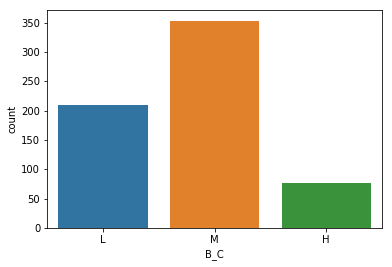

In [384]:
sns.countplot(df['B_C'])

<Figure size 1440x720 with 0 Axes>

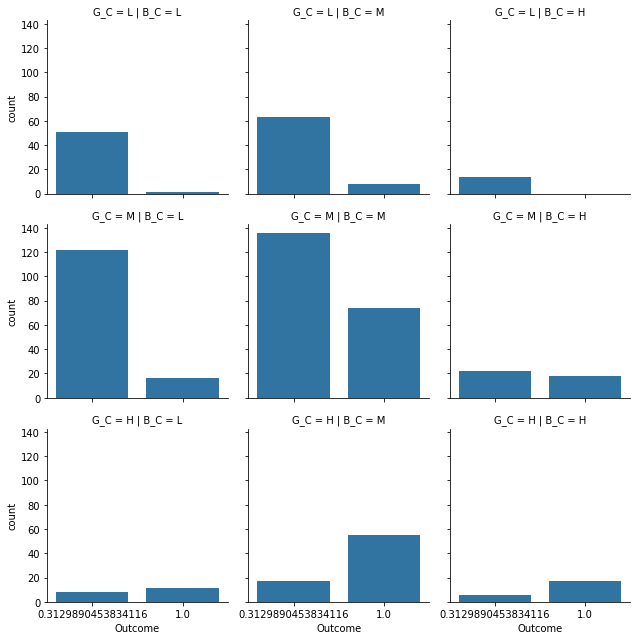

In [385]:
plt.figure(figsize=(20,10))
g=sns.FacetGrid(df,col='B_C',row='G_C')
g.figure.subplots_adjust(wspace=.02, hspace=.02)
g.map(sns.countplot,"Outcome")


## Let's drop the categorical columns created above

In [393]:
df.drop(columns=['G_C','B_C'],axis=1,inplace=True)

KeyError: "['G_C' 'B_C'] not found in axis"

In [411]:
x=df.iloc[:,:8]
y=df.iloc[:,-1]

# Logistic Regression

In [415]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [416]:
x_train.shape[0]

614

In [417]:
x_test.shape[0]

154

In [419]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train,y_train)

In [478]:
logistic_predict=clf.predict(x_test)

In [467]:
logistic_score=clf.score(x_test,y_test)

# KNN

In [438]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')

In [439]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [480]:
knn_predict=knn.predict(x_test)

In [466]:
knn_score=knn.score(x_test,y_test)

In [459]:
scores=[]
for i in range(1,10):
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    scores.append(score)
for i,j in enumerate(scores):
    if j==max(scores):
        print('The Number of neighbors with maximum score is '+ str(i))

The Number of neighbors with maximum score is 6


# Stochastic Gradient Descent Classifier

In [481]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()
sgd_clf.fit(x_train,y_train)
sgd_predict=sgd_clf.predict(x_test)
SGDClassifier_score=sgd_clf.score(x_test,y_test)

In [476]:
print(' Logistic Regression classsification Score:    ' + str(logistic_score))
print(' KNN Regression classification Score:          '+ str(knn_score))
print(' Stochastic Gradient Descent Classifier Score  ' + str(SGDClassifier_score))

 Logistic Regression classsification Score:    0.7662337662337663
 KNN Regression classification Score:          0.6818181818181818
 Stochastic Gradient Descent Classifier Score  0.4090909090909091


# Metrics

In [485]:
from sklearn.metrics import mean_squared_error
logistic_mse=mean_squared_error(y_test,logistic_predict)
logistic_rmse=np.sqrt(logistic_mse)
logistic_rmse

0.48349377841522817

In [488]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,logistic_predict)

array([[85, 15],
       [21, 33]], dtype=int64)

### Based on the above scores we would have selected the Logistic Regression Classificaiton algorithm for classification
### Let's take a look at other classification metrics such as confusion matrix and classification reports

In [477]:
from sklearn.metrics import confusion_matrix